In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0934210301PNS003SRSPEC0006.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.107e-02 +/- 1.488e-03 (67.8 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-6
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 7414 sec
 Using fit statistic: chi
 Using Background File                P0934210301PNS003BGSPEC0006.FTZ
  Background Exposure Time: 7414 sec
 Using Response (RMF) File            epn_e3_ff20_sdY9.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0934210301PNS003SRCARF0006.FTZ



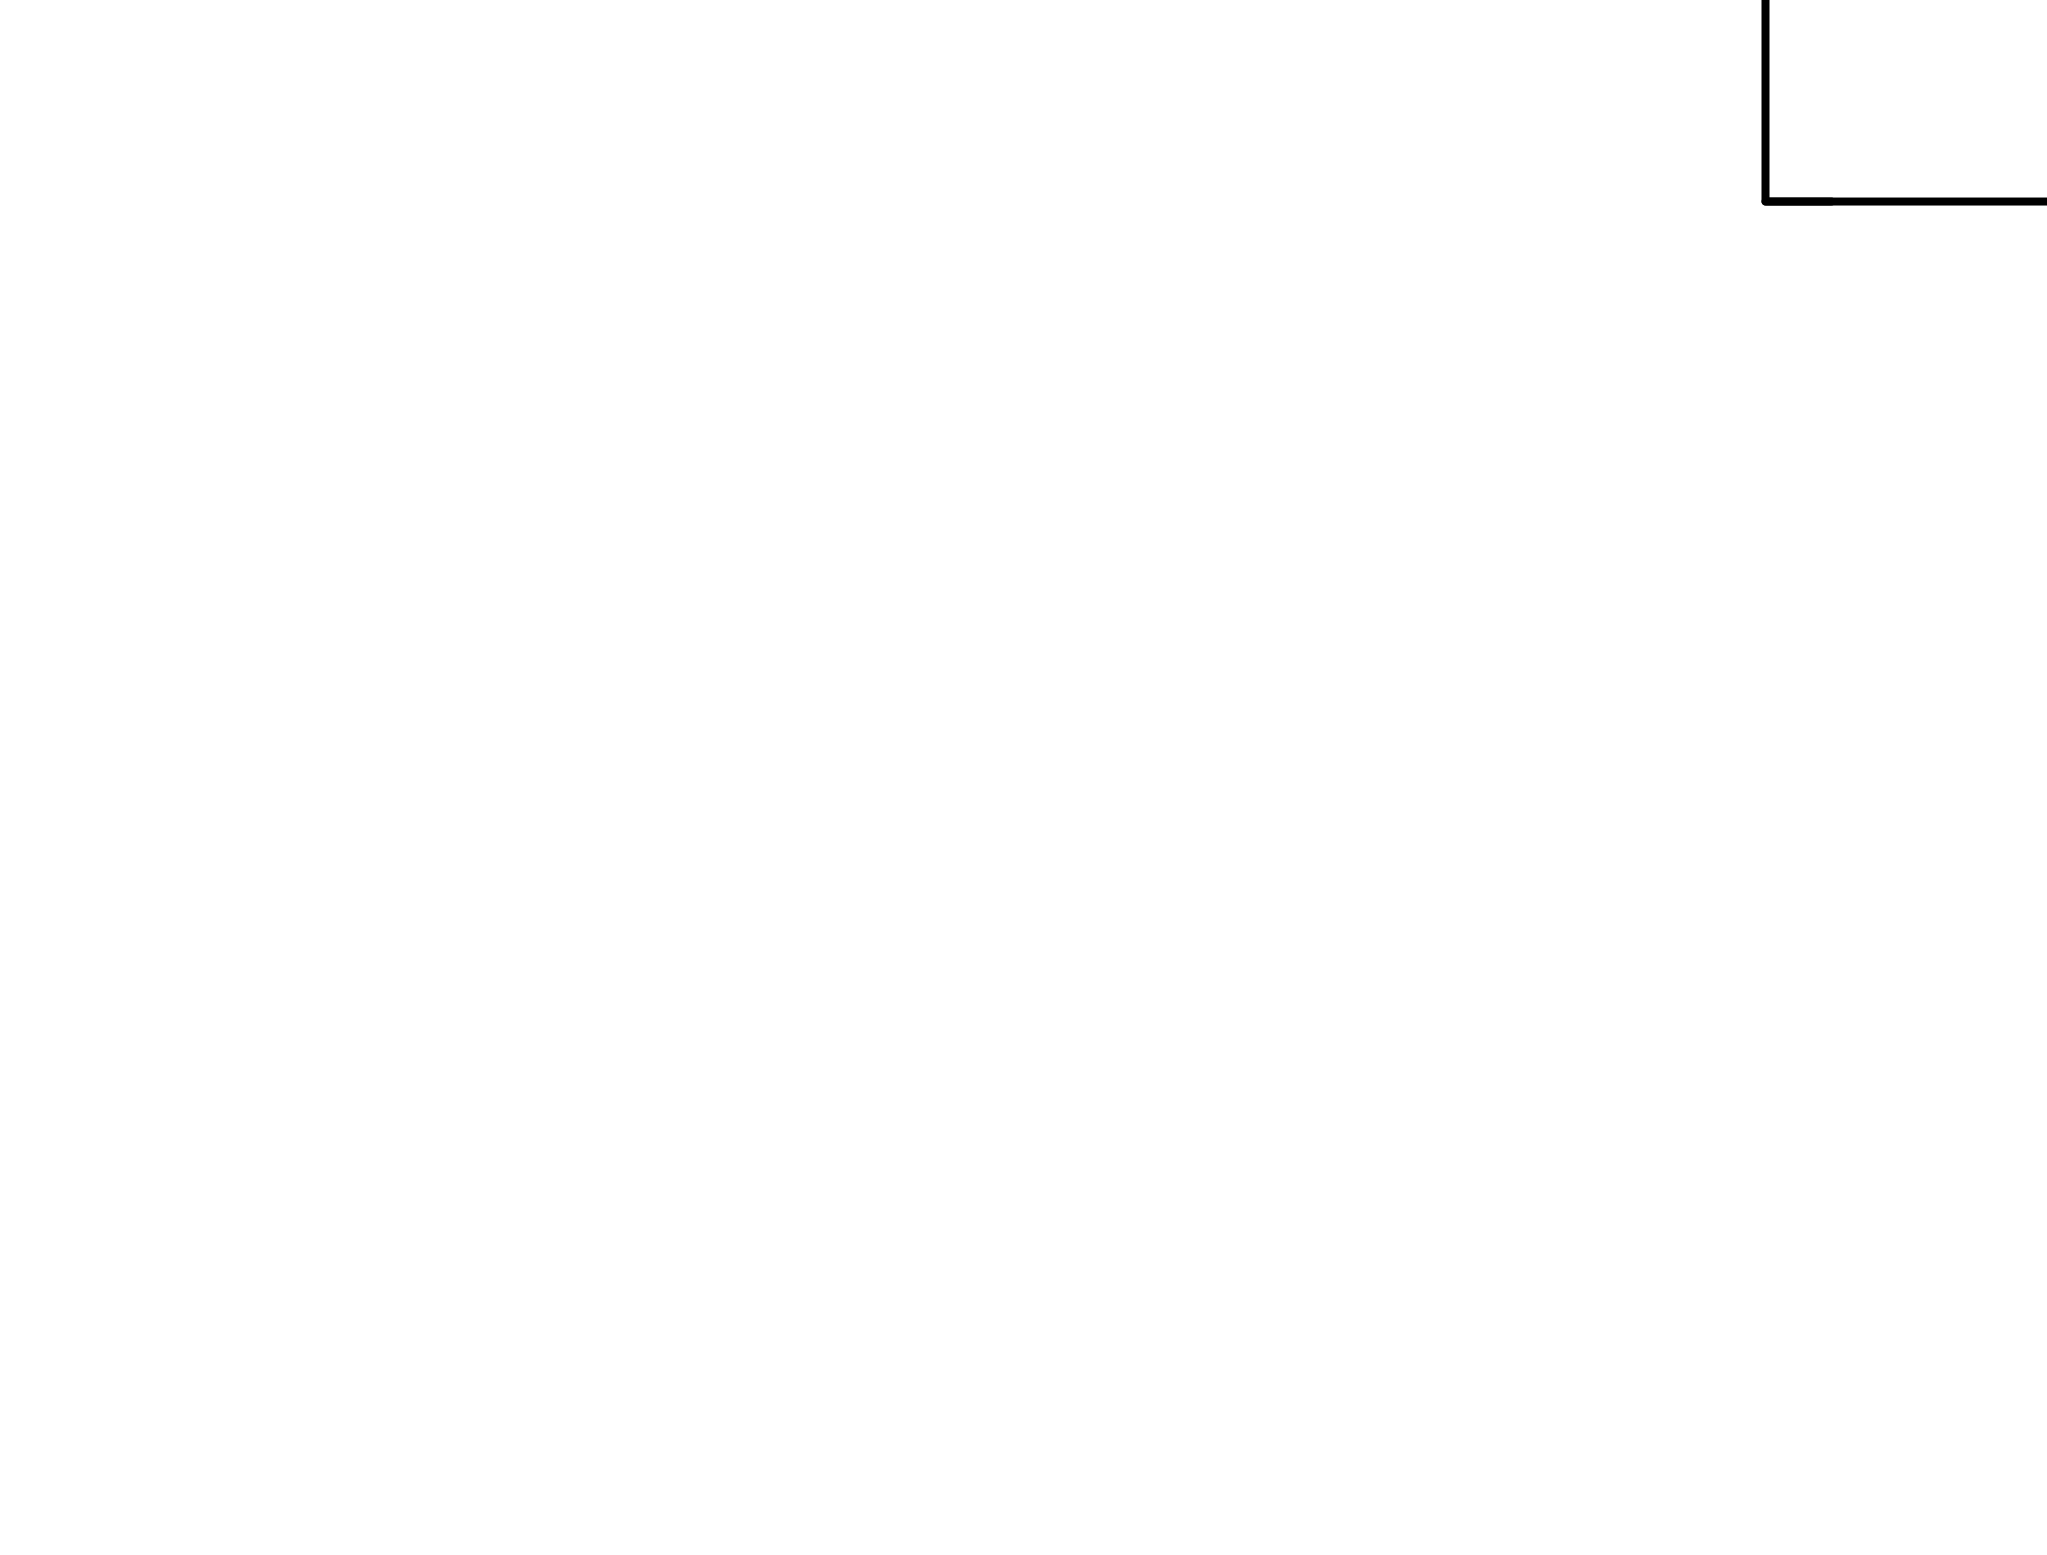

In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.0001 0.01")
Plot("data")
#spec.ignore("**-0.2 12.0-**")

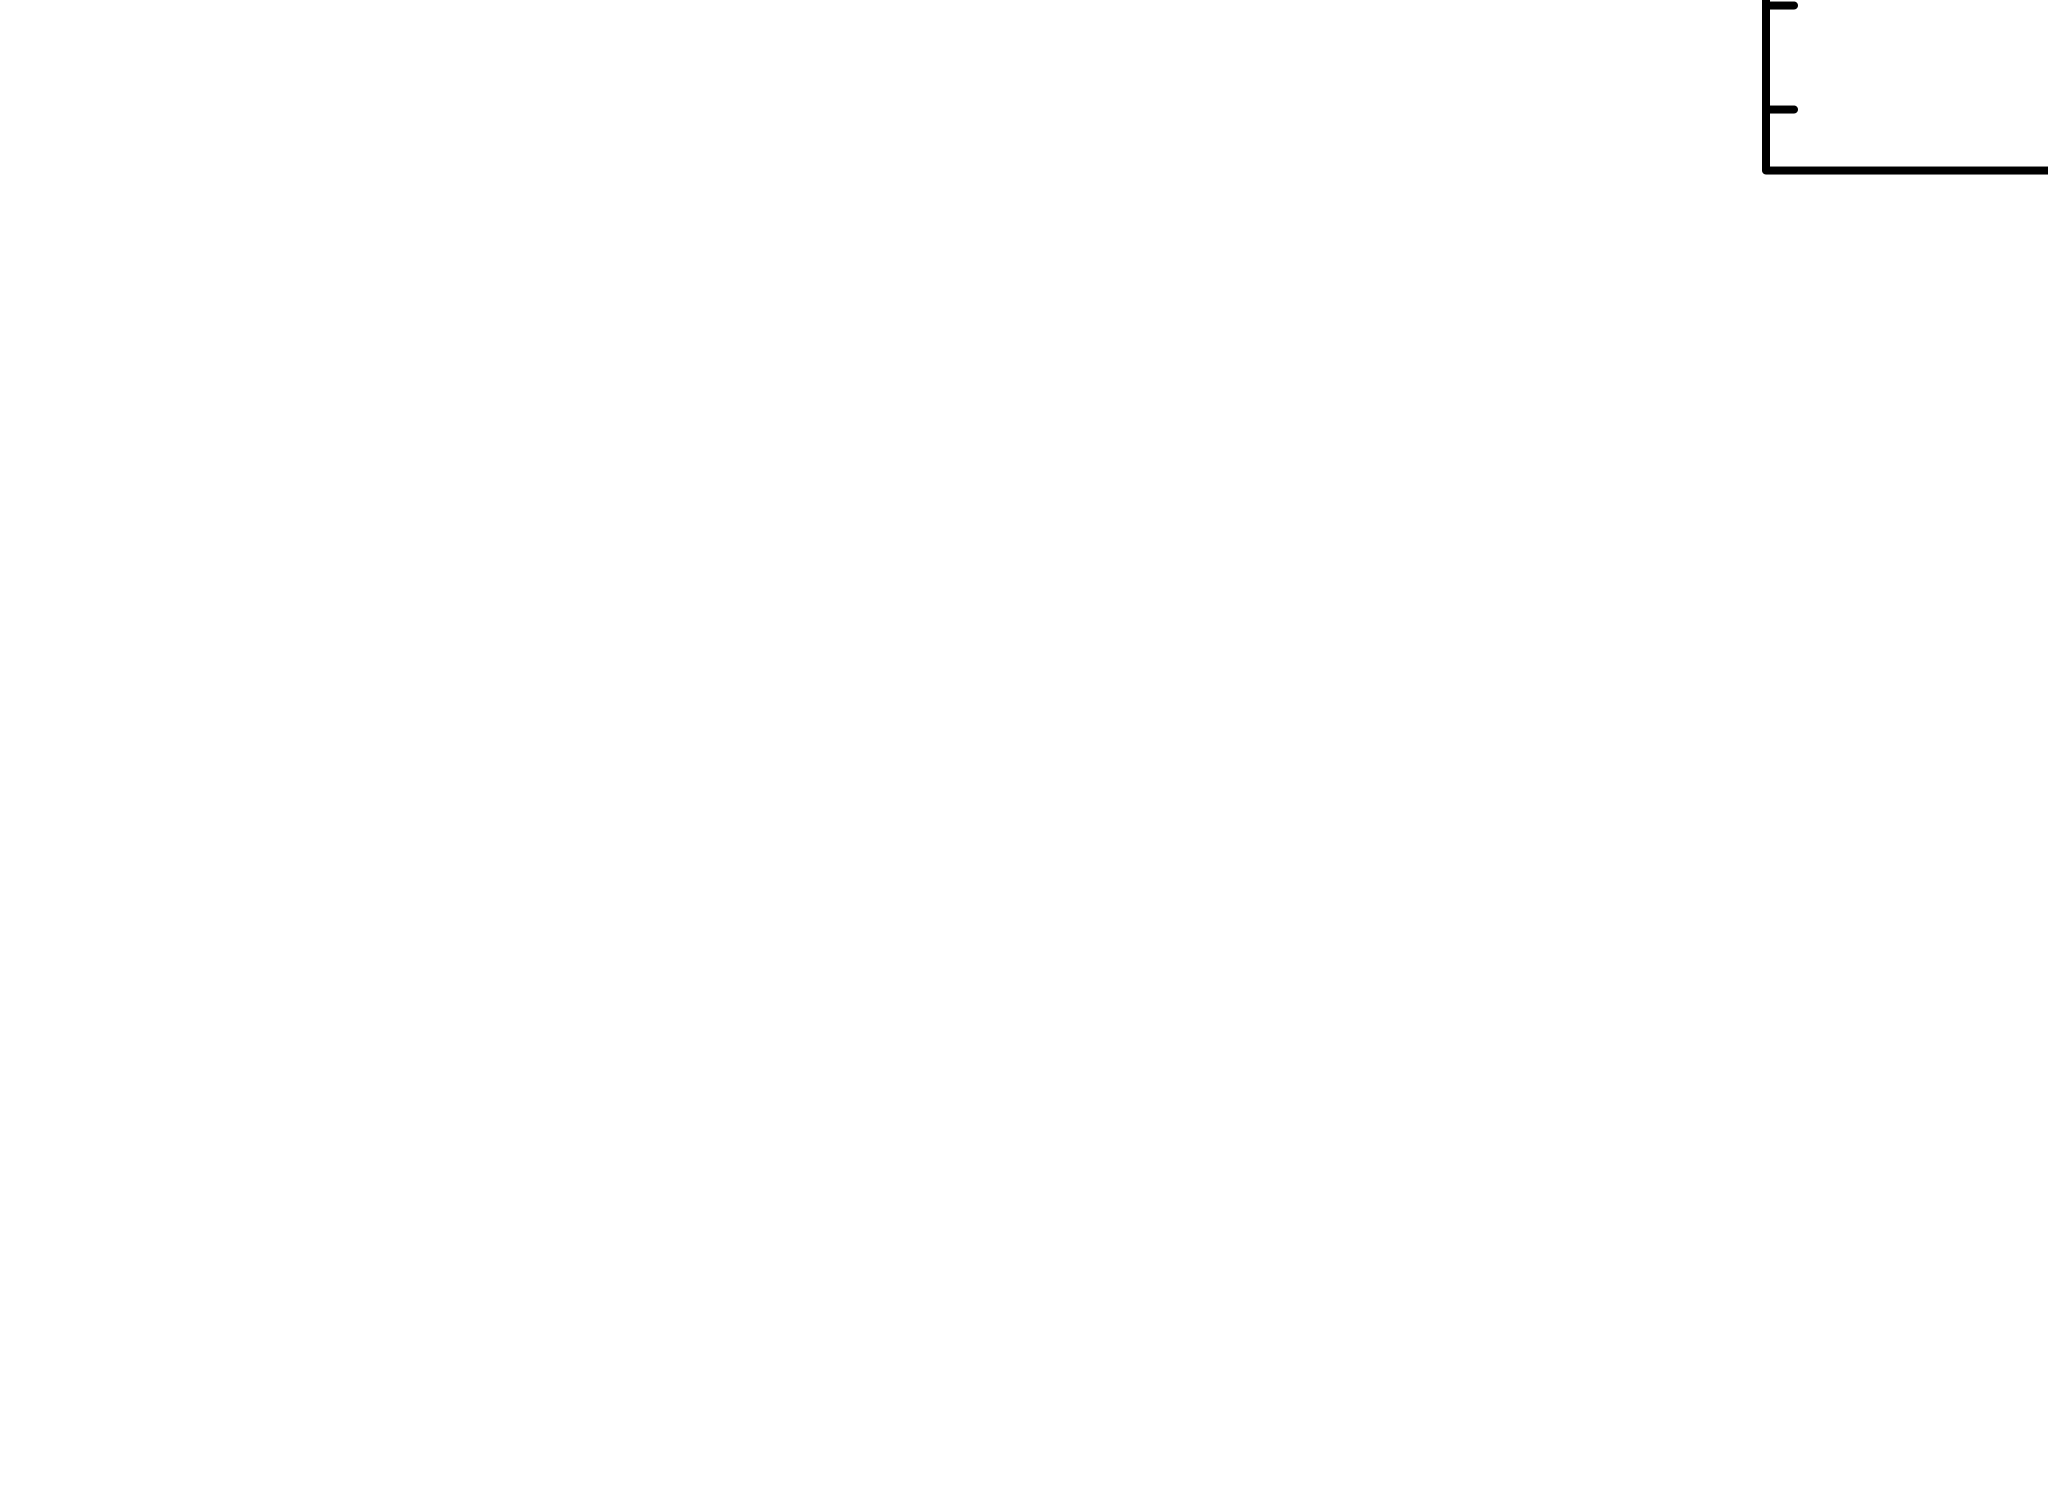


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              1.640019e+12     using 6 bins.

Tes

In [3]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

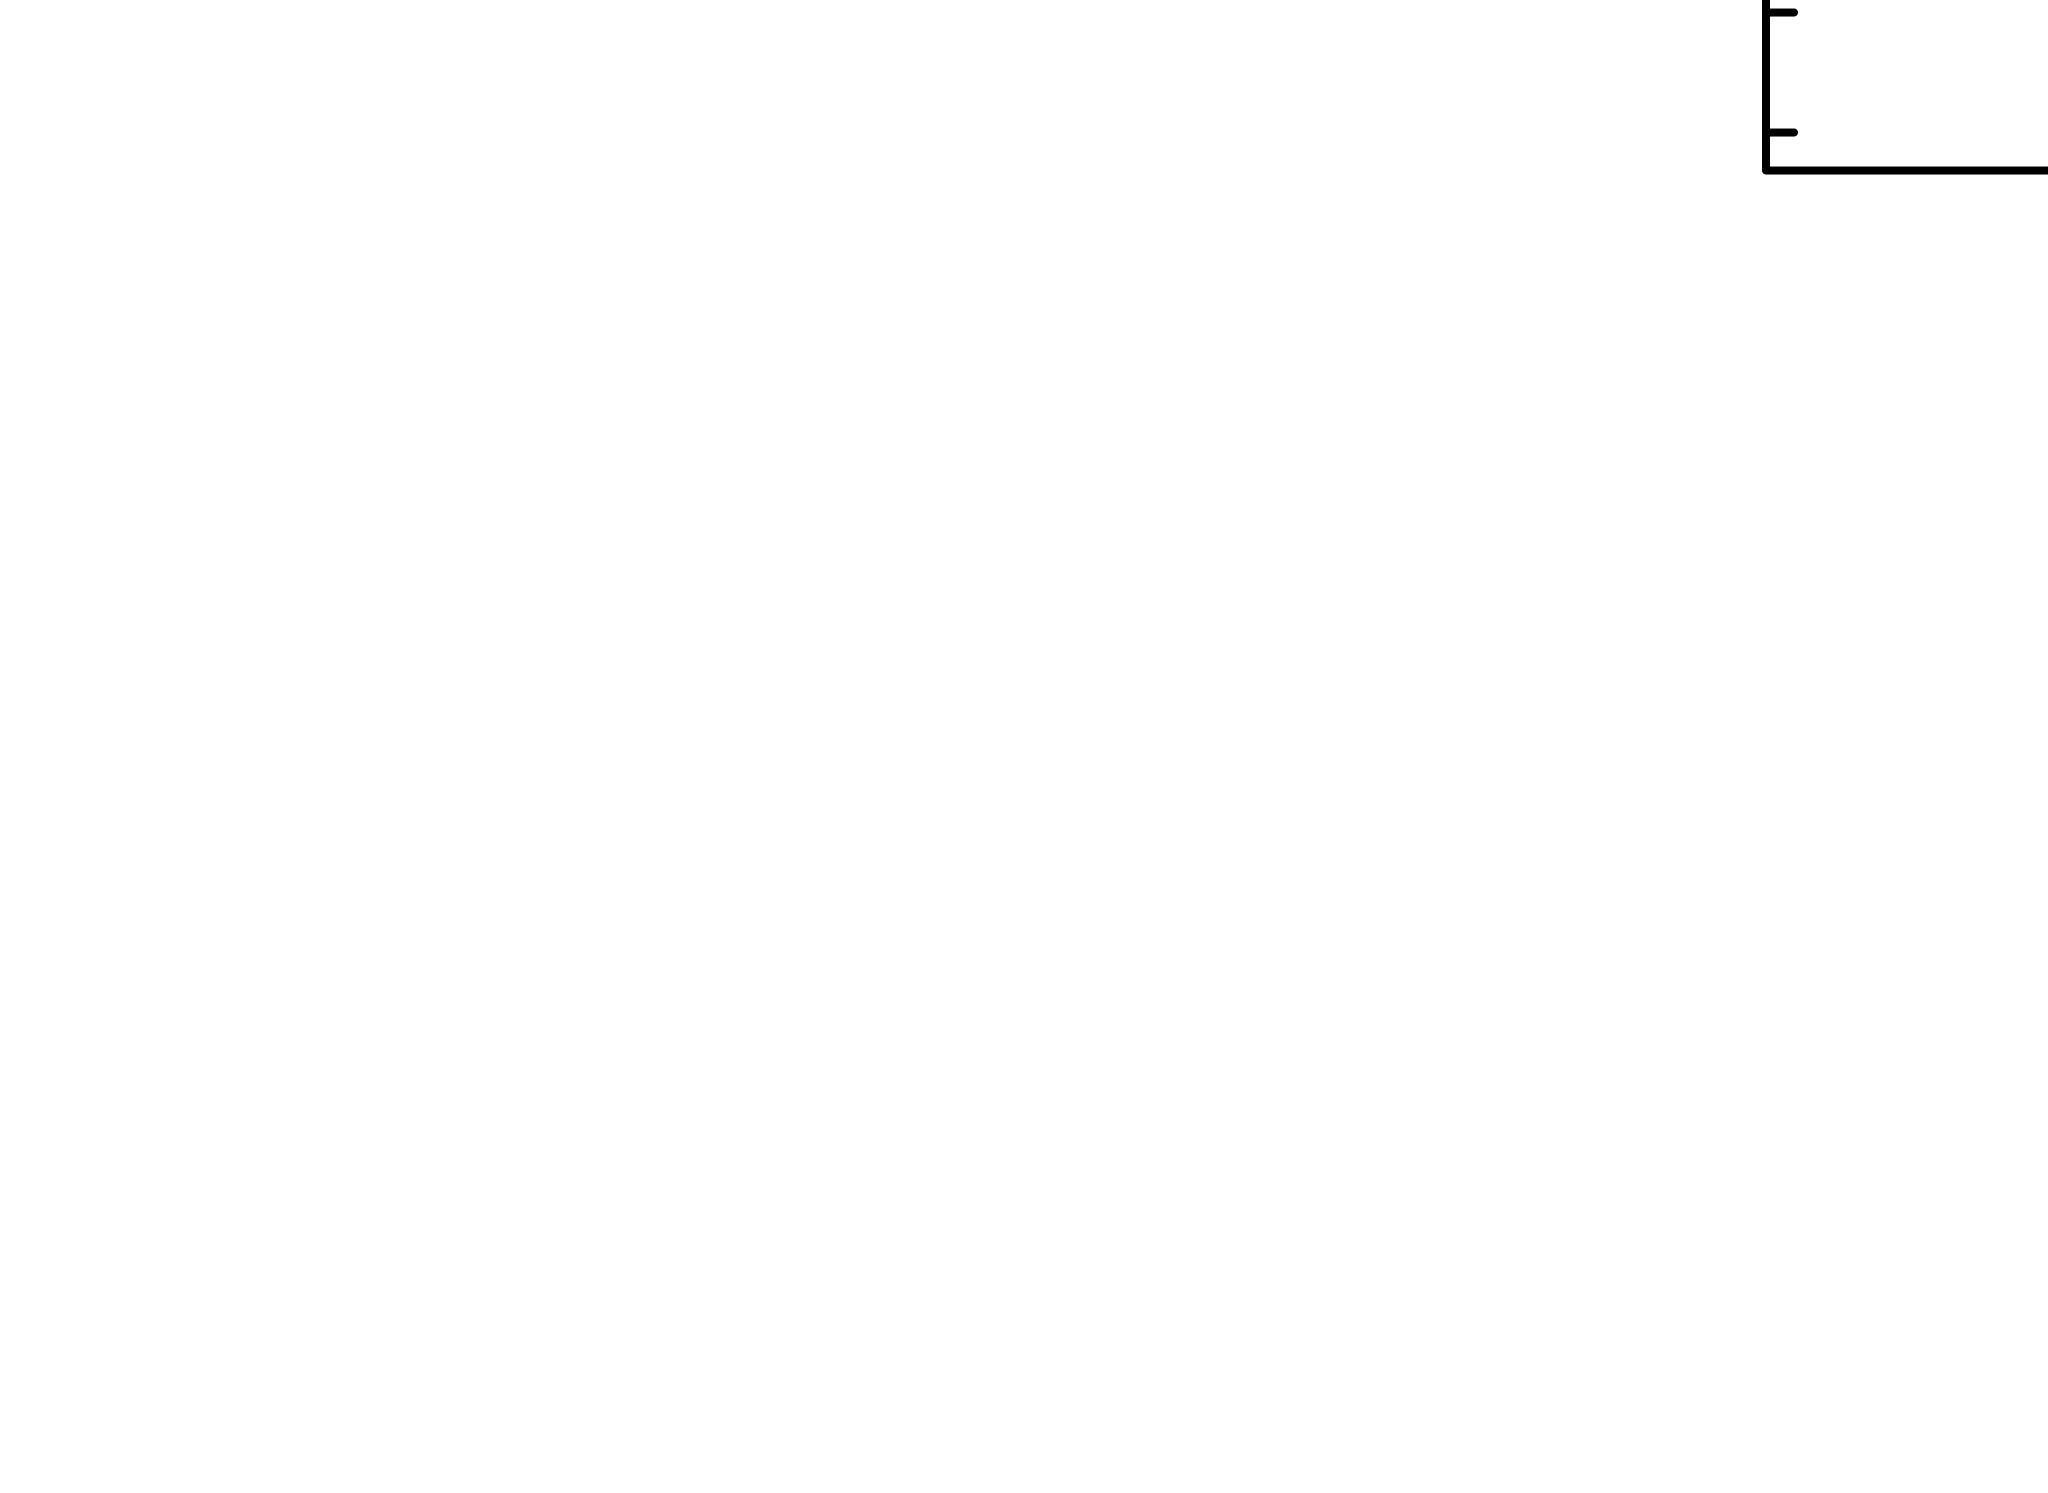


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.038744e+11     using 6 bins.

Test statistic : Chi-Squared              4.038744e+11     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
11.635       4.56728      -2       3.13455       1.23851   2.02305e-05
10.7211      112481       -2       4.81709       1.53872   3.71859e-05
10.2962      68449.8      -3       5.58617       1.88374   6.75324e-05
8

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              8.378529e+10     using 6 bins.

Test statistic : Chi-Squared              8.378529e+10     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
10.889       2.45997      -3       4.27556       24.2733   4.61376e-05
9.13877      56088.1      -1       4.56054       12.6699   5.69359e-05
8.93304      15311.1      -2       4.87593       12.8108   6.18925e-05
8.9

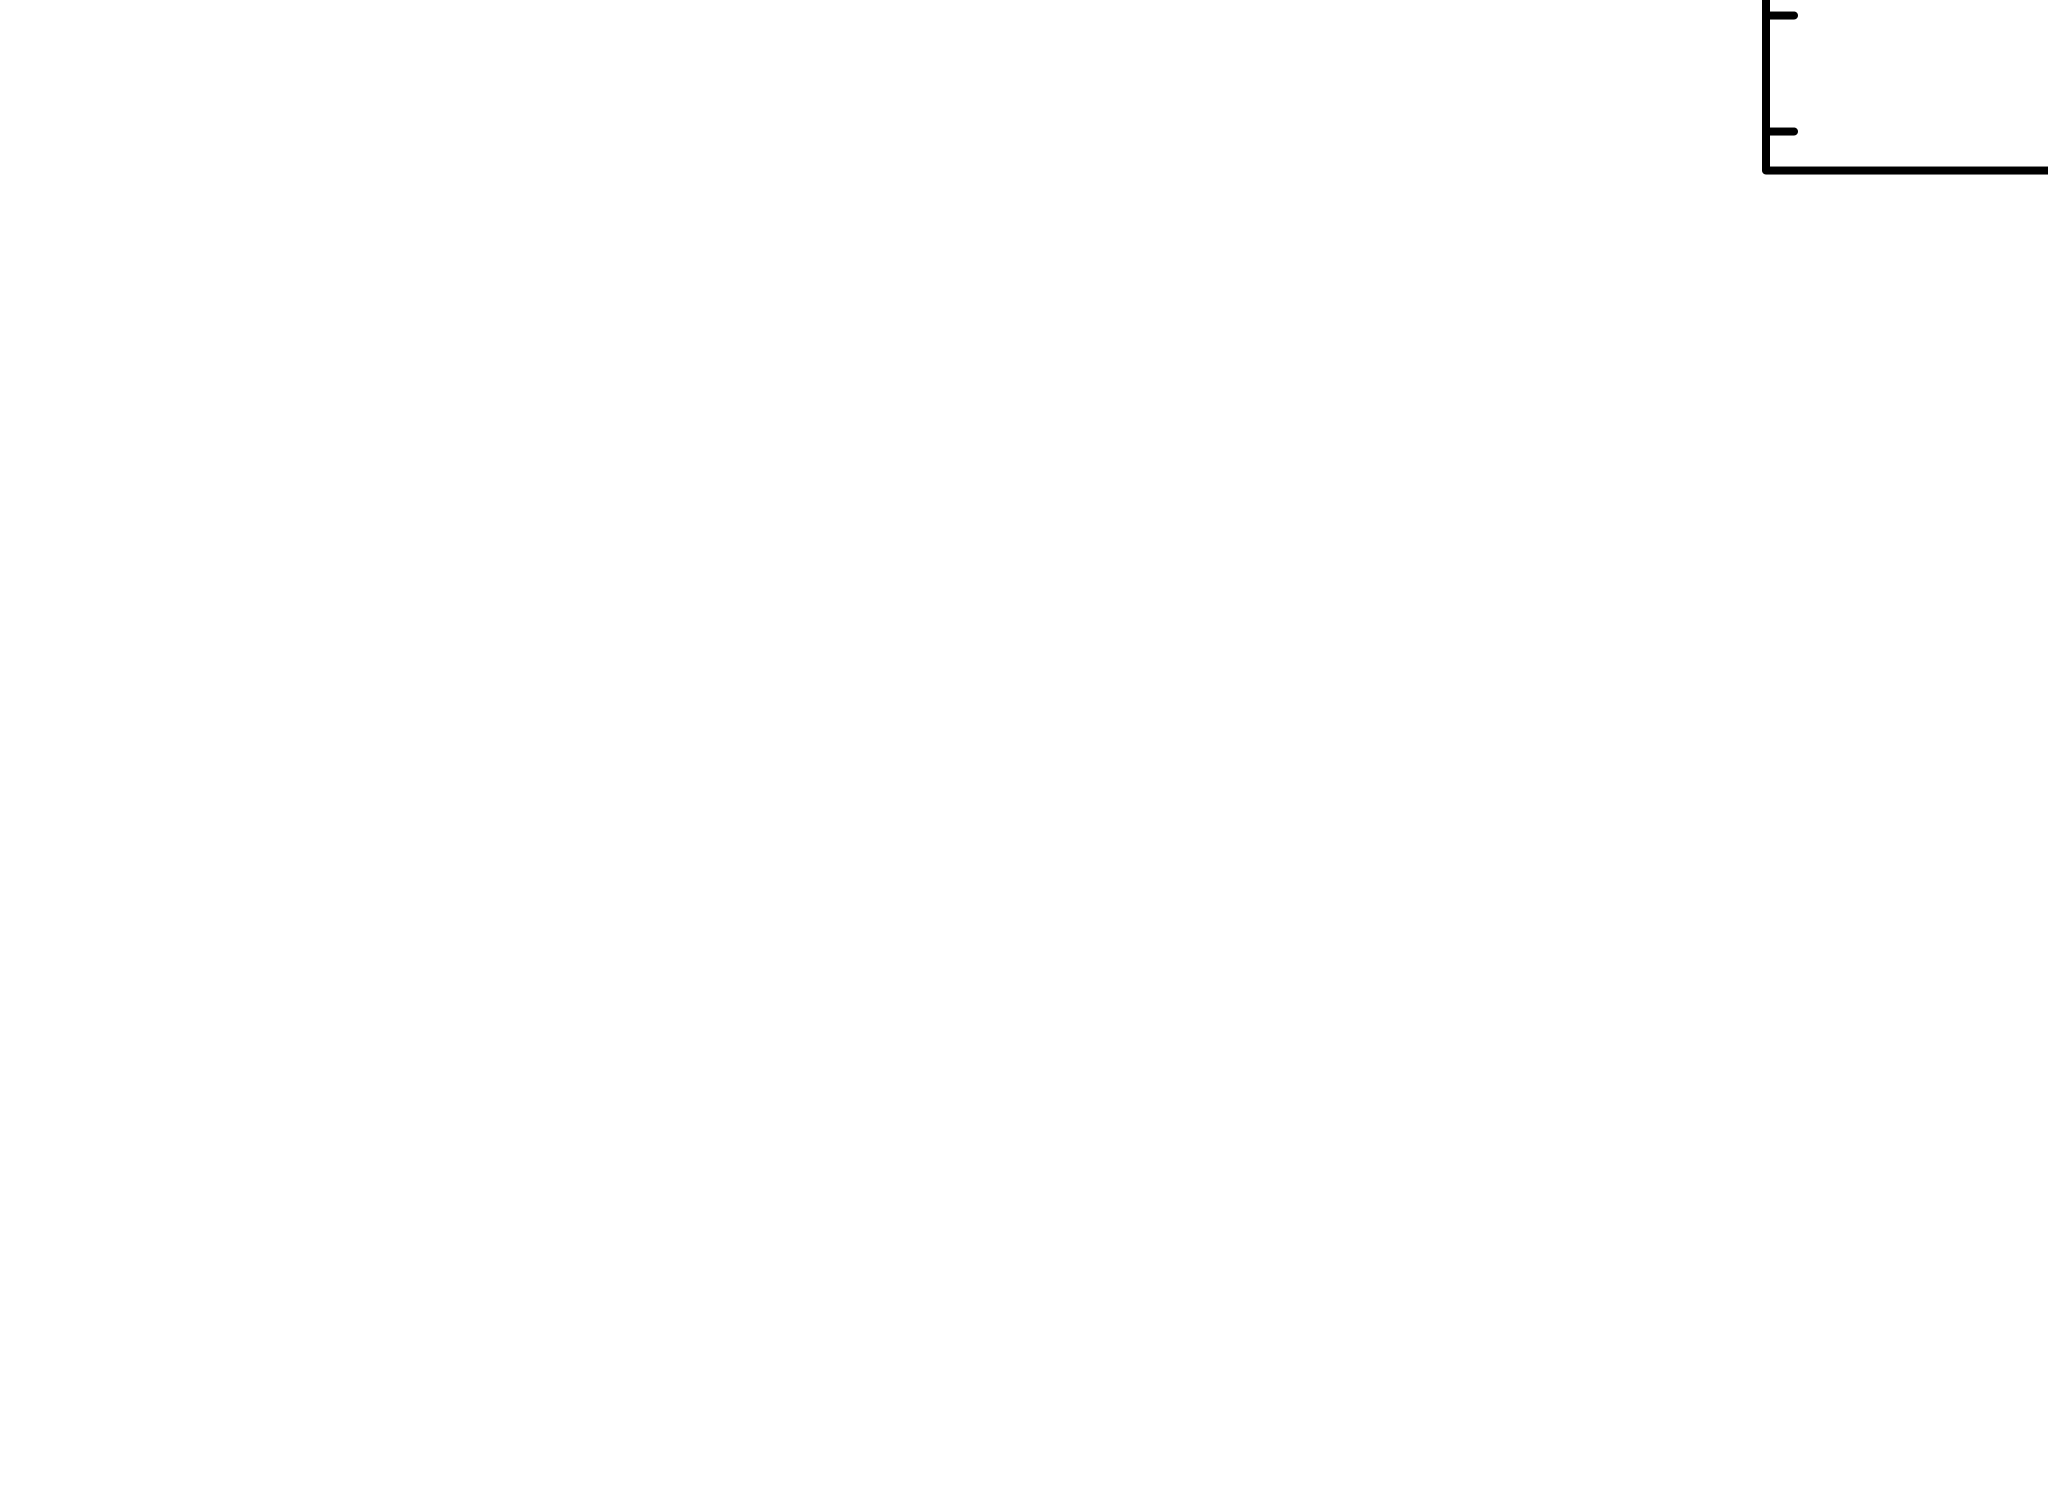

In [5]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              3.112744e+10     using 6 bins.

Test statistic : Chi-Squared              3.112744e+10     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
55.419       0.436987     -3    0.00549359       37.3600   2.6

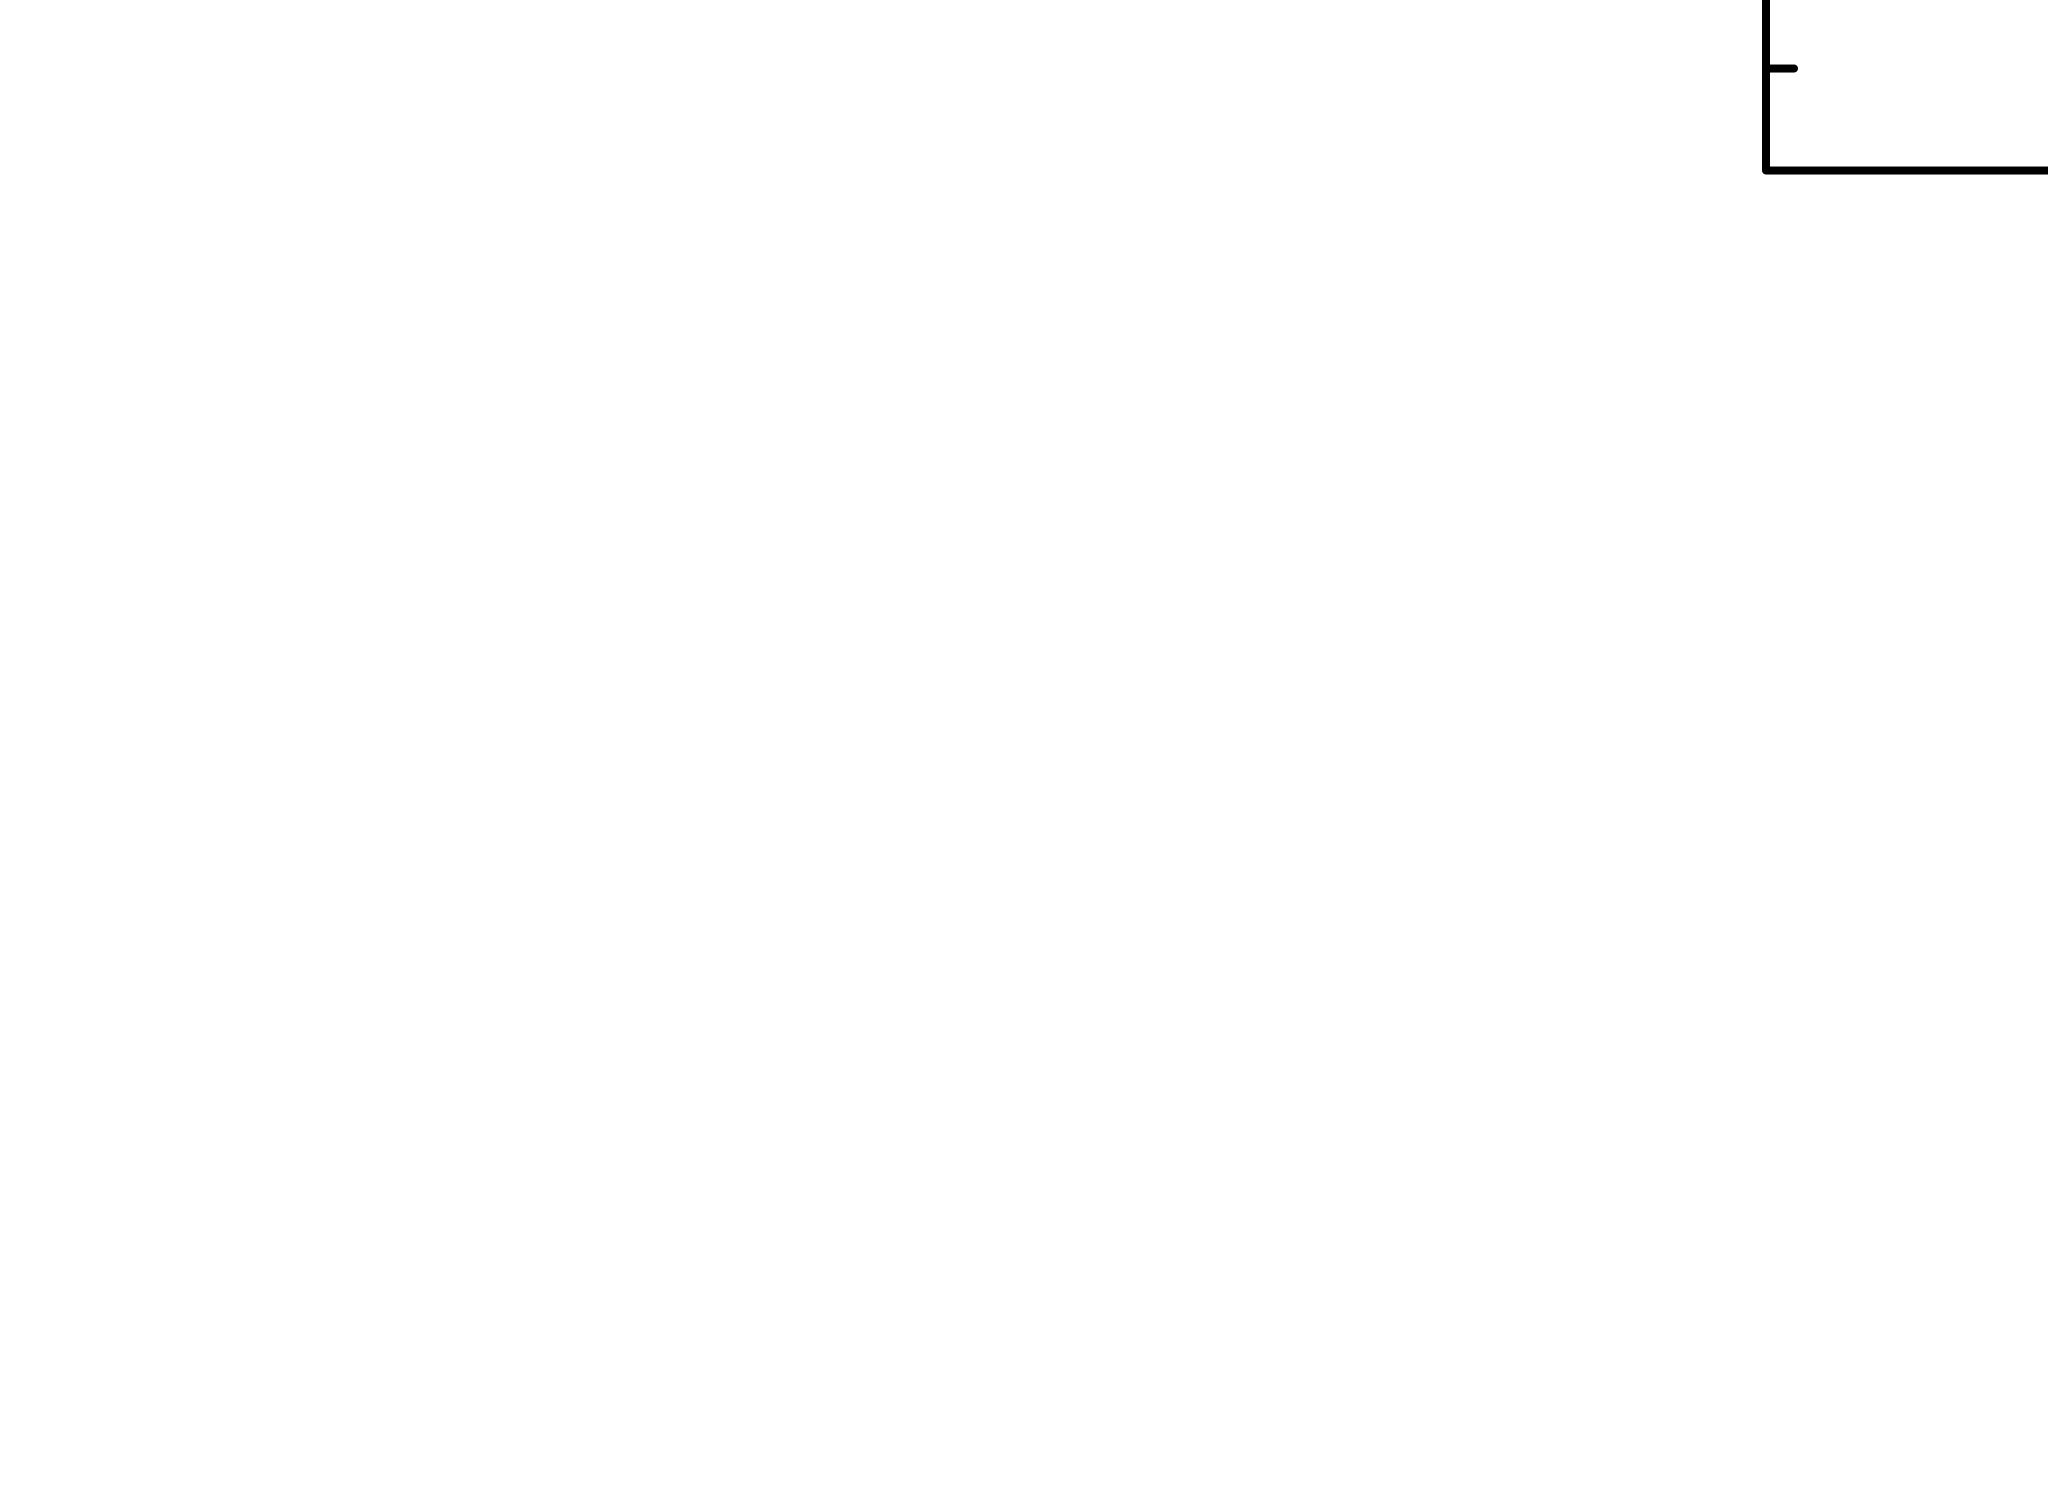

In [6]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

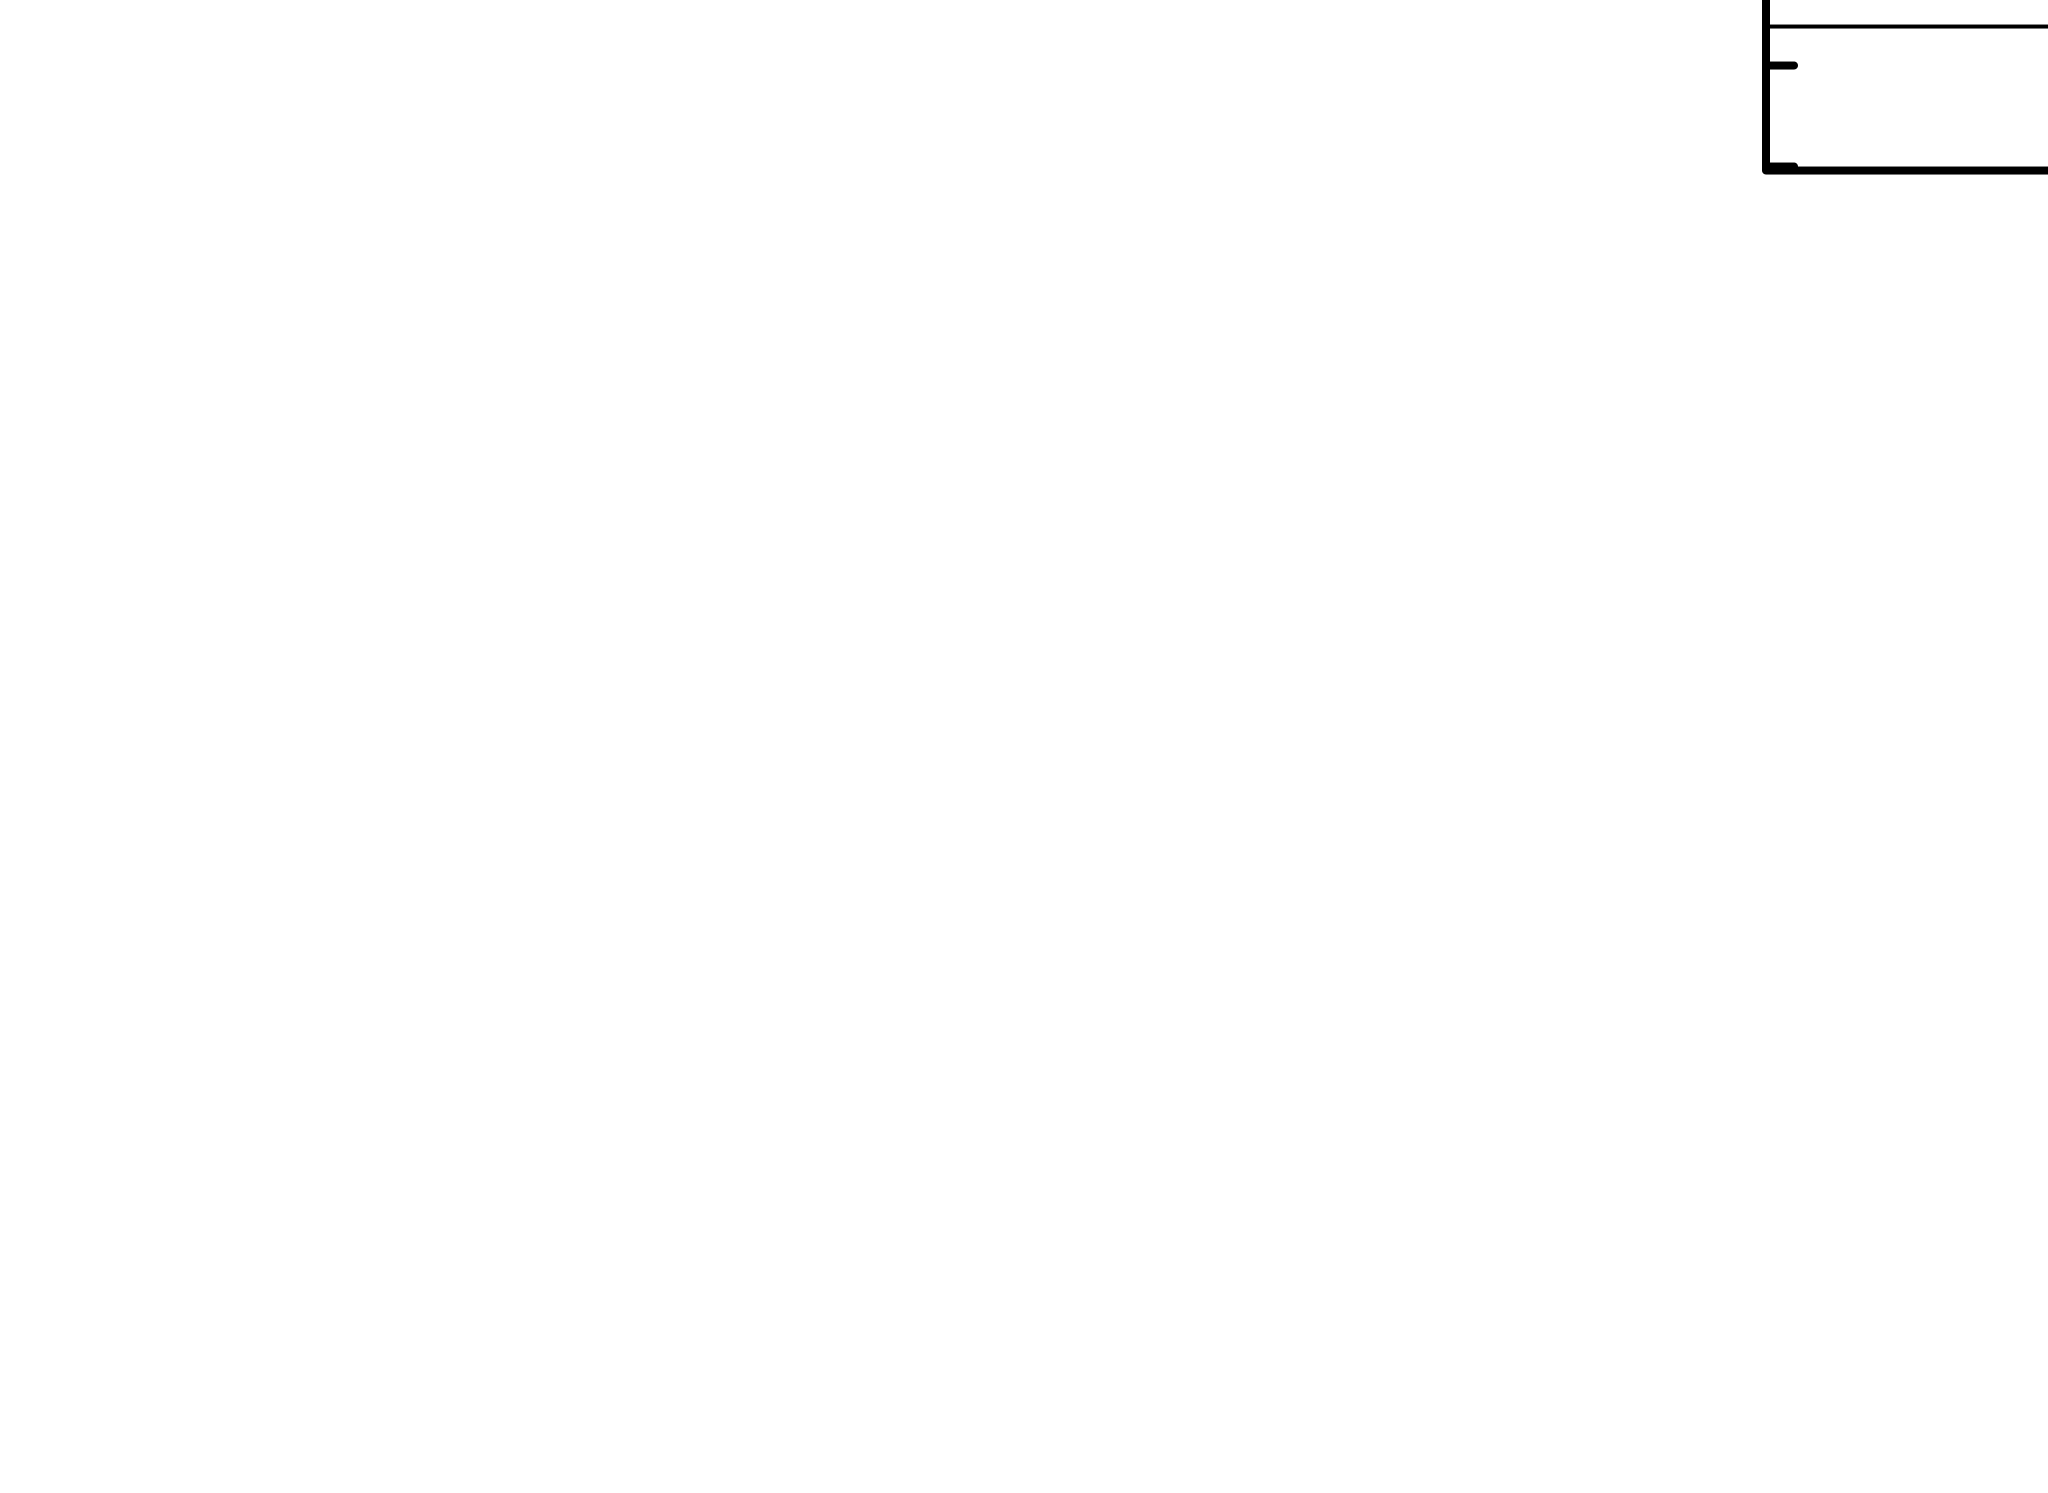

GammQ: A <=  0
GammQ: A <=  0



Model TBabs<1>(powerlaw<2> + gaussian<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
   4    3   gaussian   LineE      keV      6.50000      +/-  0.0          
   5    3   gaussian   Sigma      keV      0.100000     +/-  0.0          
   6    3   gaussian   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              9.356167e+11     using 6 bins.

Test statistic : Chi-Squared              9.356167e+11     using 6 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.013278e+12     using 6 bins.

Test statistic : Chi-Squared            

In [7]:
AllModels.clear()
mo = Model("tbabs*(powerlaw+gaussian)")
mo.gaussian.LineE = 6.4
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot("data resid")

GammQ: A <=  0
GammQ: A <=  0


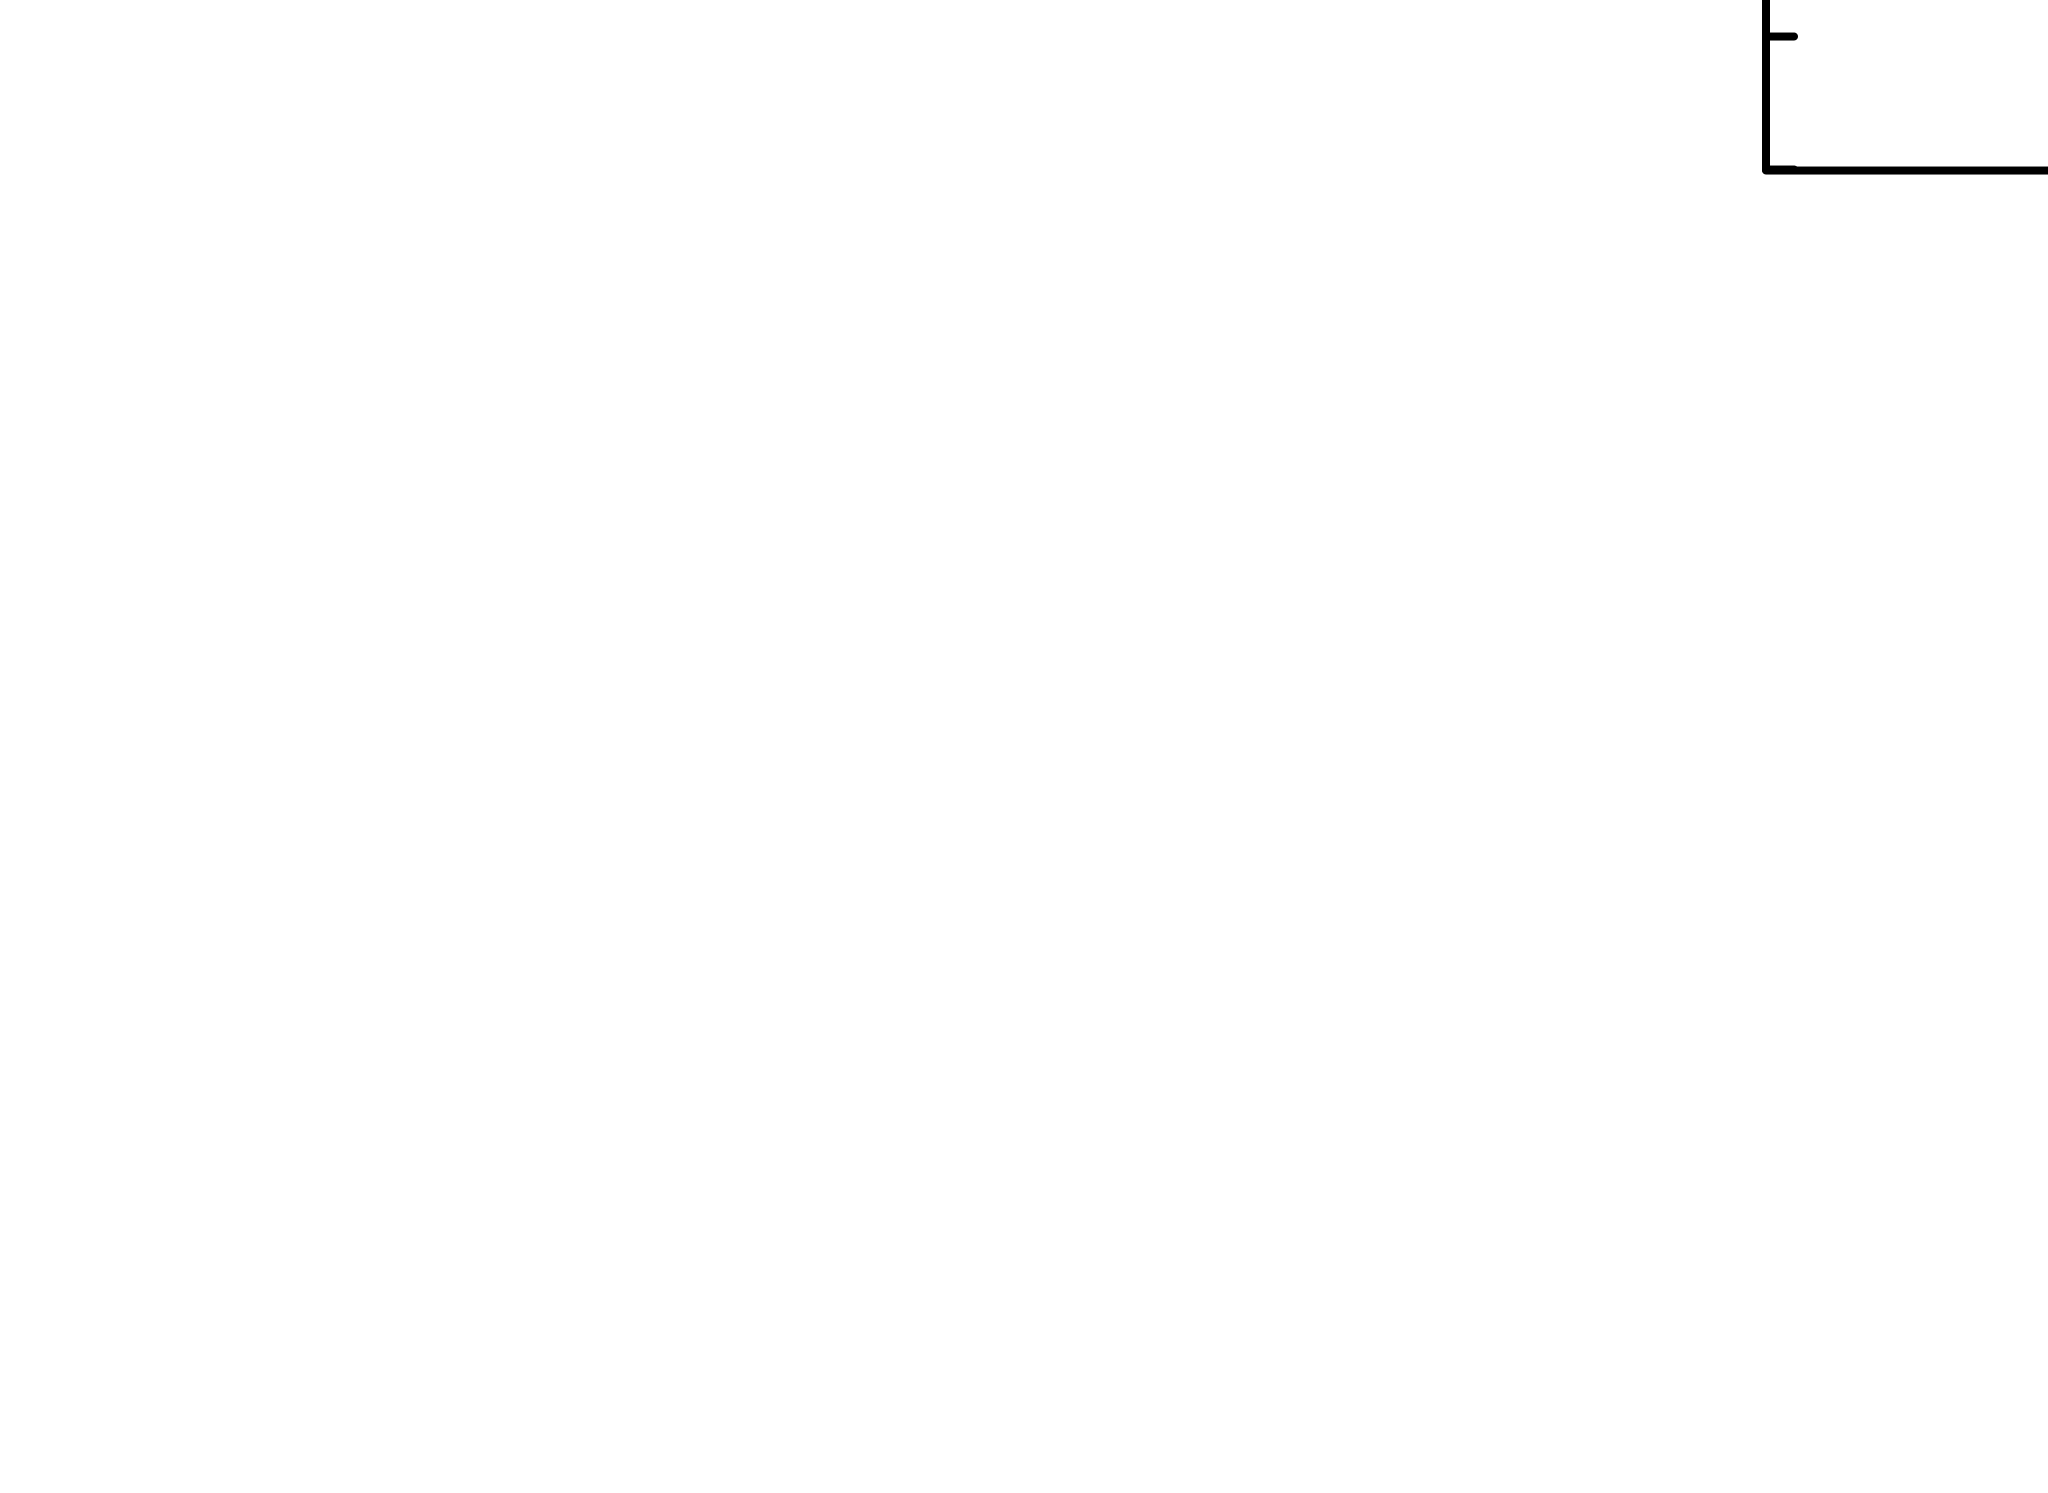


Model TBabs<1>(bbody<2> + gaussian<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   gaussian   LineE      keV      6.50000      +/-  0.0          
   5    3   gaussian   Sigma      keV      0.100000     +/-  0.0          
   6    3   gaussian   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.840066e+12     using 6 bins.

Test statistic : Chi-Squared              2.840066e+12     using 6 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              2.852025e+12     using 6 bins.

Test statistic : Chi-Squared              2

In [8]:
AllModels.clear()
mo = Model("tbabs*(bbody+gaussian)")
mo.gaussian.LineE = 6.4
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot("data resid")

In [9]:
AllModels.calcFlux(".2 12.0")

 Model Flux 2.2915e-05 photons (1.7308e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [10]:
#plx = 1.4843
d_kpc = 8
F_x = 1.8924*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

1.4486864438747137e+33


In [11]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.78)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', F_x/F_opt)

Optical Flux:  5.119049146085544e-14
F_x / F_opt:  3.6967802925804856
